In [1]:
# import libraries
import pandas as pd

## Exploratory data analysis

In [2]:
# read the dataset
df=pd.read_csv('CoineBase/coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv')

In [3]:
# print the head of the dataset
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# print df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016354 entries, 0 to 2016353
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 123.1 MB


In [5]:
# print df describe
df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.016354e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06
mean,1.481396e+09,3.208583e+03,3.209990e+03,3.207058e+03,3.208584e+03,7.684054e+00,3.551276e+04,3.208523e+03
std,3.493807e+07,3.873144e+03,3.875432e+03,3.870698e+03,3.873140e+03,1.820454e+01,1.411277e+05,3.873066e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.451159e+09,4.156000e+02,4.156800e+02,4.155000e+02,4.155900e+02,8.776600e-01,5.962574e+02,4.155902e+02
50%,1.481404e+09,9.099600e+02,9.101000e+02,9.095700e+02,9.099800e+02,2.641103e+00,3.313449e+03,9.099194e+02
75%,1.511649e+09,6.374660e+03,6.375150e+03,6.373310e+03,6.374670e+03,7.478157e+00,1.855195e+04,6.374404e+03
max,1.541894e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028EEA26E808>,
      dtype=object)

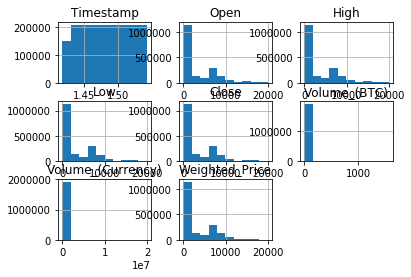

In [6]:
# visualize the data set
df.hist()

In [7]:
# check missing values
df.isnull().any()

Timestamp            False
Open                  True
High                  True
Low                   True
Close                 True
Volume_(BTC)          True
Volume_(Currency)     True
Weighted_Price        True
dtype: bool

In [8]:
# check sum of missing values
df.isnull().sum()

Timestamp                 0
Open                 108957
High                 108957
Low                  108957
Close                108957
Volume_(BTC)         108957
Volume_(Currency)    108957
Weighted_Price       108957
dtype: int64

In [9]:
# shape of the dataframe
df.shape

(2016354, 8)

In [10]:
# check  duplicates
df.duplicated().sum()

0

## Data Cleaning

In [11]:
# fill missing value 
df['Volume_(BTC)']=df['Volume_(BTC)'].fillna(value=0)
df['Volume_(Currency)']=df['Volume_(Currency)'].fillna(value=0)
df['Weighted_Price']=df['Weighted_Price'].fillna(value=0)

df['Open']=df['Open'].fillna(method='ffill')
df['High']=df['High'].fillna(method='ffill')
df['Low']=df['Low'].fillna(method='ffill')
df['Close']=df['Close'].fillna(method='ffill')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,300.0,300.0,300.0,300.0,0.00,0.0,0.0
2,1417412100,300.0,300.0,300.0,300.0,0.00,0.0,0.0
3,1417412160,300.0,300.0,300.0,300.0,0.00,0.0,0.0
4,1417412220,300.0,300.0,300.0,300.0,0.00,0.0,0.0


In [12]:
# check null values
df.isnull().any()

Timestamp            False
Open                 False
High                 False
Low                  False
Close                False
Volume_(BTC)         False
Volume_(Currency)    False
Weighted_Price       False
dtype: bool

In [16]:
# convert the timestamp column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2014-12-01 05:33:00,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,2014-12-01 05:34:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
2,2014-12-01 05:35:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
3,2014-12-01 05:36:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0
4,2014-12-01 05:37:00,300.0,300.0,300.0,300.0,0.00,0.0,0.0


In [20]:
# check the data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016354 entries, 0 to 2016353
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Timestamp          datetime64[ns]
 1   Open               float64       
 2   High               float64       
 3   Low                float64       
 4   Close              float64       
 5   Volume_(BTC)       float64       
 6   Volume_(Currency)  float64       
 7   Weighted_Price     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 123.1 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E86DFEF48>,
      dtype=object)

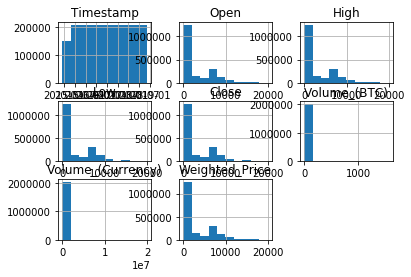

In [21]:
# hist graphs
df.hist()

## TimeSeries analysis